Naive Bayes

compraron o no compraron en una tienda en relación a su edad y su salario

referencia https://www.jacobsoft.com.mx/es_mx/clasificador-naive-bayes/

In [1]:
# Naive Bayes

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importacion del dataset
dataset = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Ahora dividimos el conjunto de datos en un subconjunto de entrenamiento y un subconjunto de pruebas

In [3]:
# Division de datos para entrenamientoy prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

Después de crear el conjunto de entranamiento y el de pruebas, ahora estandarizamos las escalas

In [4]:
# Ajuste de escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Ya con las escalas estandarizadas, ahora creamos el modelo con la clase KNeighborsClassifier del paquete sklearn

Esta clase es la que nos permite utilizar el clasificador de Naive Bayes

In [5]:
# Creacion del modelo Naive Bayes
# y entrenamiento del mismo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Hacemos la predicción del conjunto de pruebas

In [6]:
# Prediccion del conjunto de prueba
y_pred = classifier.predict(X_test)

Con ello generamos la matriz de confusión

In [7]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

En la matriz de confusión observamos que hay 3 falsos negativos y 7 falsos positivos, en total 10 errores de una muestra de 100, por lo que tenemos una precisión del 90%

Graficamos los resultados de predicción contra los del conjunto de pruebas

/tmp/ipython-input-8-4273680359.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


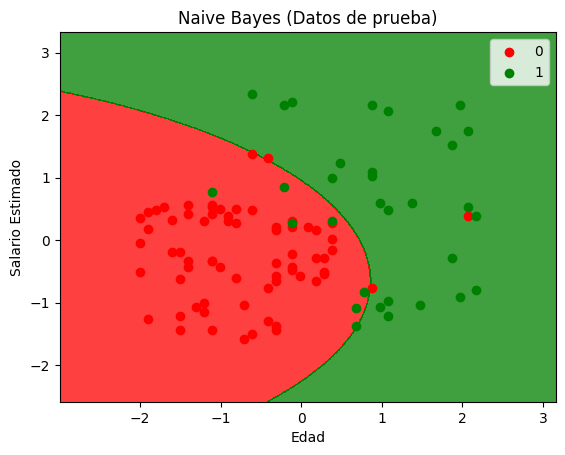

In [8]:
# Visualizacion de los datos de prueba
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Datos de prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()